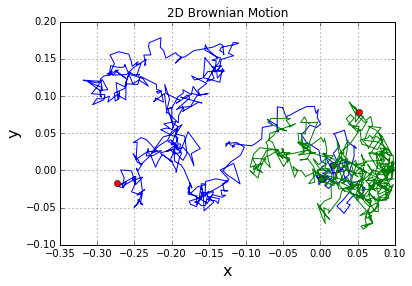

In [2]:
%matplotlib inline
from math import sqrt
import numpy as np
import pandas as pd
from pylab import plot, show, grid, axis, xlabel, ylabel, title, semilogx, xlim, ylim, hist
import track_analysis as ta

# Number of steps.
N = 500
# Time step size
dt = 0.04
# Total time.
T = N * dt
# frames per second
fps = 1/dt
# microns per pixel
mpp = 1
# diffusion coefficent of each particle
D = 0.001
# spatial dimensions
dims = 2 

# Initial values of x.
x = np.empty((2,N+1))
x[:, 0] = 0.0

num_particles = 10
particles = []
for p in range(num_particles):
    bx = ta.brownian(x[:,0], N, dt, D)
    bdf = pd.DataFrame()
    bdf["x"] = bx[0,:]
    bdf["y"] = bx[1,:]
    bdf["frame"] = np.arange(N)
    bdf["particle"] = np.ones(N)*(p+1)
#     cx = ta.confined_naive(x[:,0], N, dt, D, radius=0.05,dims=dims)
#     cdf = pd.DataFrame()
#     cdf["x"] = cx[0,:]
#     cdf["y"] = cx[1,:]
#     cdf["frame"] = np.arange(N)
#     cdf["particle"] = np.ones(N)*(p+1)
    particles.append(bdf)
#     particles.append(cdf)
brown_df = pd.concat(particles).reset_index(drop=True)

num_particles = 10
particles = []
for p in range(num_particles):
    cx = ta.confined_naive(x[:,0], N, dt, D, radius=0.1,dims=dims)
    cdf = pd.DataFrame()
    cdf["x"] = cx[0,:]
    cdf["y"] = cx[1,:]
    cdf["frame"] = np.arange(N)
    cdf["particle"] = np.ones(N)*(p+1)
    particles.append(cdf)
#     particles.append(cdf)
confined_df = pd.concat(particles).reset_index(drop=True)

# Plot the 2D trajectory.
plot(bx[0],bx[1])
plot(cx[0],cx[1])    
# Mark the start and end points.
plot(bx[0,0],bx[1,0], 'go')
plot(bx[0,-1], bx[1,-1], 'ro')
plot(cx[0,0],cx[1,0], 'go')
plot(cx[0,-1], cx[1,-1], 'ro')
# More plot decorations.
title('2D Brownian Motion')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
axis('equal')
grid(True)
show()

In [3]:
bsmss = ta.imss(brown_df,mpp,fps,100)
bsmss['gamma']

0    [-1.49182963843e-31, 0.554241287347, 1.0585701...
1    [-1.49182963843e-31, 0.336103013797, 0.6691985...
2    [-1.49182963843e-31, 0.515620221902, 1.0201839...
3    [-1.49182963843e-31, 0.51765027301, 0.99725940...
4    [-1.49182963843e-31, 0.434485422319, 0.8893647...
5    [-1.49182963843e-31, 0.550356137719, 1.0980405...
6    [-1.49182963843e-31, 0.533352437587, 1.0538734...
7    [-1.49182963843e-31, 0.471151842707, 0.8982920...
8    [-1.49182963843e-31, 0.491199482467, 0.9905234...
9    [-1.49182963843e-31, 0.589381388964, 1.1121959...
Name: gamma, dtype: object

In [4]:
csmss = ta.imss(confined_df,mpp,fps,100)

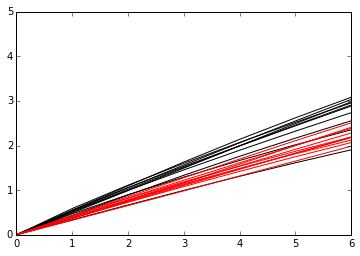

In [5]:
for b in bsmss.loc[:,['gamma']].values:
    plot(np.arange(7),b[0],'k-')

for c in csmss.loc[:,['gamma']].values:
    plot(np.arange(7),c[0],'r-')
ylim([0,5])
show()

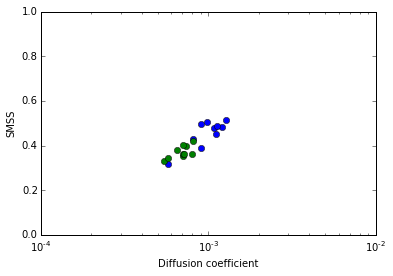

In [6]:
semilogx(bsmss["D2"],bsmss["smss"],'o')
semilogx(csmss["D2"],csmss["smss"],'o')
xlim([1e-4,1e-2])
ylim([0,1])
xlabel("Diffusion coefficient")
ylabel("SMSS")
show()

In [8]:
bmsd = ta.imsd(brown_df,mpp,fps,100)
diff = ta.linear_regress(bmsd,log=True)#[0]['intercept']/4
print diff

(        slope    intercept  good
1     1.05857  0.004334634  True
2   0.6691986  0.002286458  True
3    1.020184  0.004806857  True
4   0.9972594  0.004428734  True
5   0.8893648   0.00322808  True
6    1.098041  0.005064393  True
7    1.053873  0.003910922  True
8    0.898292  0.003618704  True
9   0.9905235  0.003602983  True
10   1.112196  0.004474606  True,                     1         2         3         4         5         6   \
lag time [s]                                                               
0.04          0.000144  0.000265  0.000180  0.000179  0.000184  0.000148   
0.08          0.000299  0.000422  0.000365  0.000357  0.000342  0.000316   
0.12          0.000459  0.000553  0.000553  0.000535  0.000490  0.000494   
0.16          0.000623  0.000671  0.000741  0.000712  0.000633  0.000677   
0.20          0.000789  0.000779  0.000931  0.000890  0.000771  0.000865   
0.24          0.000957  0.000880  0.001121  0.001067  0.000907  0.001057   
0.28          0.001126  0.0

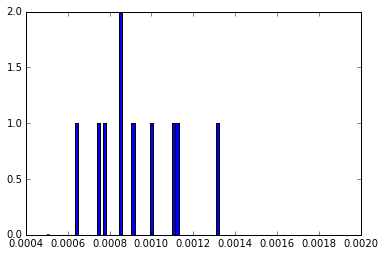

In [6]:
h = hist(diff.values,bins=100,range=(0.0005,0.002))

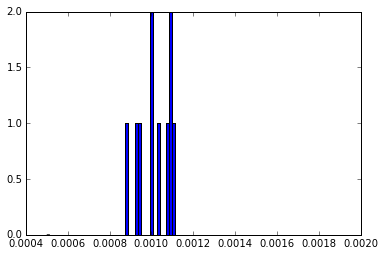

In [7]:
bmsd = ta.imsd(brown_df,mpp,fps,100)
diff = ta.linear_regress(bmsd,log=False,clip=4)[0]['slope']/4
h = hist(diff.values,bins=100,range=(0.0005,0.002))

(          slope     intercept  good
1   0.004376166 -2.384218e-05  True
2   0.003998507 -3.295018e-05  True
3   0.004347764 -1.794502e-05  True
4   0.003690664  1.299247e-05  True
5    0.00433976 -1.823131e-05  True
6   0.004438899 -2.096162e-05  True
7    0.00351298  2.894255e-05  True
8   0.004021032  -5.17732e-06  True
9   0.003753116  1.883187e-05  True
10  0.004127542  -7.02527e-06  True,                     1         2         3         4         5         6   \
lag time [s]                                                               
0.08         -0.000024 -0.000033 -0.000018  0.000013 -0.000018 -0.000021   
0.12         -0.000024 -0.000033 -0.000018  0.000013 -0.000018 -0.000021   
0.16         -0.000024 -0.000033 -0.000018  0.000013 -0.000018 -0.000021   
0.20         -0.000024 -0.000033 -0.000018  0.000013 -0.000018 -0.000021   

                    7         8         9         10  
lag time [s]                                          
0.08          0.000029 -0.000005  0

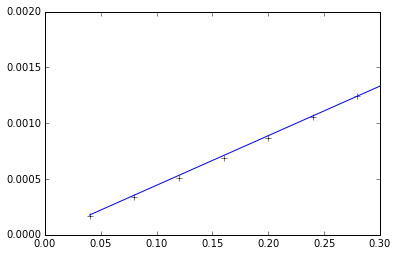

In [8]:
d = ta.linear_regress(bmsd,log=False,clip=4)
print d
idx = 6
plot(bmsd.index.values,bmsd[idx],'k+')
fit = bmsd.index.values*d[0]['slope'][idx]
plot(bmsd.index.values,fit)
ylim([0,0.002])
xlim([0,0.3])
show()